In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from model import *

In [29]:
import pandas as pd 

df = pd.read_csv("prices_all_5m.csv")
n = len(df)
startingRow = 0


In [30]:
#paramaters for SIMULATION

# APY's
lendRate = .00
borrowRate = .00
farmRate = .3

#SIM INFO
stepsPerYear = 365*24*12 #if simulating hourly set to be 365 * 24 

annualRates = {'lend' : lendRate, 'borrow' : borrowRate, 'farm' : farmRate}
adjRates = {'lend' : ((1 + lendRate)**(1/stepsPerYear) - 1), 
            'borrow' : ((1 + borrowRate)**(1/stepsPerYear) - 1),
            'farm' : (farmRate / stepsPerYear)}



In [31]:
#SIM HELPERS
def setInitialValues() :
    vol1 = volume1
    vol2 = volume2 
    lp = createLp(vaultToken, secondaryToken, vol1, vol2)
    vaultInitial = createVault(vaultTVL, lendAllocation, vaultToken, secondaryToken, vol1, vol2)
    return vol1, vol2, lp, vaultInitial

def genSimulatedTrades() : 
    allTrades = []

    for i in range(nSteps) : 
        tradeStep = genTradesRandom(lambdaTrades, expScale, pBuy)
        allTrades.append(tradeStep)
    return allTrades

def simStats(vaultTVL, vaultLog) : 
    apy = (vaultLog[-1] / vaultTVL)**(stepsPerYear / nSteps) - 1
    dradown = 0
    prevMax = vaultTVL
    for i in range(len(vaultLog)) : 
        prevMax = max(prevMax, vaultLog[i])
        drawdownT = 1 - vaultLog[i] / prevMax
        drawdown = max(dradown, drawdownT)
    return apy, drawdown


In [32]:
vaultTVL = 1000.
lendAllocation = .5
vaultToken = 'USDC'
secondaryToken = 'ETH'
startingRow = 0
startingPrice = df['Close_' + secondaryToken][startingRow]
#LP Size 
volume1 =  2000000 #amount of vaultToken in LP
volume2 =  volume1 / startingPrice #amount of secondary token in LP

priceData = list(df['Close_' + secondaryToken][startingRow:])

debtLow = .98
debtHigh = 1.02

collatLow = .5
collatTarget = 1
collatHigh = 1.5

vol1, vol2, lp, vaultInitial = setInitialValues()
vaultLog, priceLog, debtRatioLog, collatRatioLog, vol1, vol2 = simulateMarket(priceData, vaultInitial, lp, vaultToken, 
                                                            secondaryToken, vol1, vol2, adjRates,
                                                            collatLow = collatLow, collatTarget = collatTarget, collatHigh = collatHigh, 
                                                            debtLow = debtLow, debtHigh = debtHigh)
vol1, vol2, lp, vaultInitial = setInitialValues()
vaultLog1, priceLog1, debtRatioLog1, collatRatioLog1, vol1, vol2 = simulateMarket(priceData, vaultInitial, lp, vaultToken, 
                                                            secondaryToken, vol1, vol2, adjRates,
                                                            collatLow = collatLow, collatTarget = collatTarget, collatHigh = collatHigh, 
                                                            debtLow = debtLow, debtHigh = debtHigh, rebalance = False)

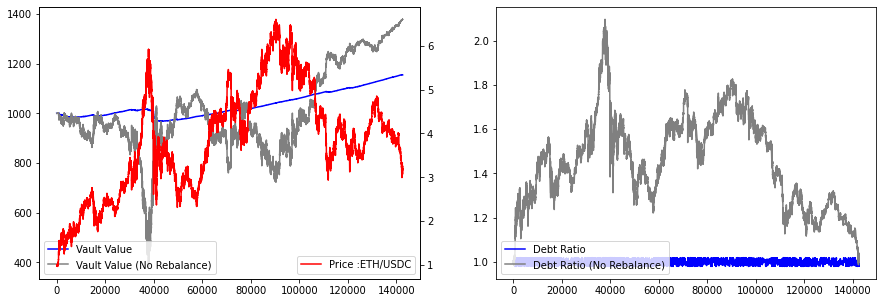

In [33]:
#plt.subplot()
fig = plt.figure()
fig.set_size_inches(15,5)

#fig.subplots_adjust(hspace=1, wspace=1)

ax = fig.add_subplot(1, 2, 1)
ax.plot(vaultLog, color = 'blue', label = 'Vault Value' )
ax.plot(vaultLog1, color = 'grey', label = 'Vault Value (No Rebalance)' )

ax.legend(loc = 'lower left')
ax2 = ax.twinx()
ax2.plot(priceLog, color = 'red', label = 'Price :' + secondaryToken + "/" + vaultToken)
#ax2.plot(debtRatioLog, color = 'orange', label = 'Debt Ratio')
ax2.legend(loc = 'lower right')

ax = fig.add_subplot(1, 2, 2)

ax.plot(debtRatioLog, color = 'blue', label = 'Debt Ratio' )
ax.plot(debtRatioLog1, color = 'grey', label = 'Debt Ratio (No Rebalance)' )
ax.legend(loc = 'lower left')

plt.show()


Above compares vault performance with No Rebalancing vs With Rebalancing 

In [34]:
vaultTVL = 1000.
lendAllocation = .5
vaultToken = 'USDC'
secondaryToken = 'BTC'
startingRow = 0
startingPrice = df['Close_' + secondaryToken][startingRow]
#LP Size 
volume1 =  2000000 #amount of vaultToken in LP
volume2 =  volume1 / startingPrice #amount of secondary token in LP

priceData = list(df['Close_' + secondaryToken][startingRow:])

In [35]:
import random

In [36]:
lendRate = .00
borrowRate = .00
farmRate = .2

#SIM INFO
stepsPerYear = 365*24*12 #if simulating hourly set to be 365 * 24 

annualRates = {'lend' : lendRate, 'borrow' : borrowRate, 'farm' : farmRate}
adjRates = {'lend' : ((1 + lendRate)**(1/stepsPerYear) - 1), 
            'borrow' : ((1 + borrowRate)**(1/stepsPerYear) - 1),
            'farm' : (farmRate / stepsPerYear)}

In [37]:
drDiff = 0.01 
nDebtRatios = 20 

apyLog = []
drDiffLog = []

priceData = list(df['Close_' + secondaryToken])
for i in range(nDebtRatios) : 
    debtLow = 1 - (i+1)*drDiff
    debtHigh = 1 + (i+1)*drDiff

    vol1, vol2, lp, vaultInitial = setInitialValues()
    vaultLog, priceLog, debtRatioLog, collatRatioLog, vol1, vol2 = simulateMarket(priceData, vaultInitial, lp, vaultToken, 
                                                                secondaryToken, vol1, vol2, adjRates,
                                                                collatLow = collatLow, collatTarget = collatTarget, collatHigh = collatHigh, 
                                                                debtLow = debtLow, debtHigh = debtHigh)    

    APY = ((vaultLog[-1] / vaultTVL) ** (len(priceData) / stepsPerYear) - 1)

    apyLog.append(APY)
    drDiffLog.append((i+1)*drDiff)
    

Text(0.5, 1.0, 'APY vs Debt Ratio Width')

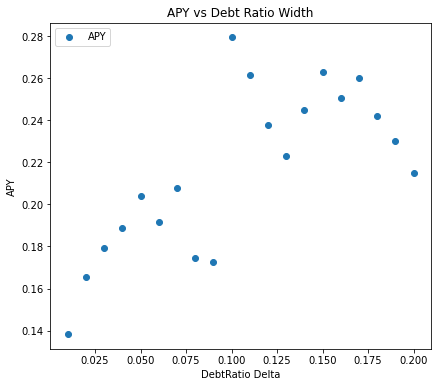

In [38]:
#IL Illuimport matplotlib.ticker as mtick
#plt.subplot()
fig = plt.figure()
fig.set_size_inches(15,6)

#fig.subplots_adjust(hspace=1, wspace=1)

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('APY')
ax.set_xlabel('DebtRatio Delta')
plt.scatter(drDiffLog, apyLog, label = "APY")
plt.legend(loc = 'upper left')
plt.title("APY vs Debt Ratio Width")

Above compares APY over full data set vs Width of Debt Ratio (where debt lower = 1 - DebtRatio delta & debt Upper = 1 + Debt Ratio Delta) 

In [45]:
#how many points per simulation 
nPoints = 24*12*90
maxStartingPoint = len(priceData) - nPoints
nSims = 5

In [46]:
#Here we take random intervals of 3 months 
#and Simulate strategy performance with different debt ratio thresholds for rebalancing 

drDiff = 0.02 
nDebtRatios = 10 

apyLog = []
drDiffLog = []

for j in range(nSims) :
    startInd = random.randint(0, maxStartingPoint)
    endInd = startInd + nPoints
    priceData = list(df['Close_' + secondaryToken][startInd:endInd])
    for i in range(nDebtRatios) : 
        debtLow = 1 - (i+1)*drDiff
        debtHigh = 1 + (i+1)*drDiff

        vol1, vol2, lp, vaultInitial = setInitialValues()
        vaultLog, priceLog, debtRatioLog, collatRatioLog, vol1, vol2 = simulateMarket(priceData, vaultInitial, lp, vaultToken, 
                                                                    secondaryToken, vol1, vol2, adjRates,
                                                                    collatLow = collatLow, collatTarget = collatTarget, collatHigh = collatHigh, 
                                                                    debtLow = debtLow, debtHigh = debtHigh)    

        APY = ((vaultLog[-1] / vaultTVL) ** (len(priceData) / stepsPerYear) - 1)

        apyLog.append(APY)
        drDiffLog.append((i+1)*drDiff)
    

Text(0.5, 1.0, 'APY vs Debt Ratio Width')

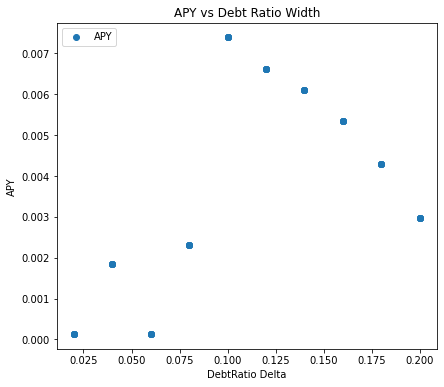

In [47]:
#IL Illuimport matplotlib.ticker as mtick
#plt.subplot()
fig = plt.figure()
fig.set_size_inches(15,6)

#fig.subplots_adjust(hspace=1, wspace=1)

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('APY')
ax.set_xlabel('DebtRatio Delta')
plt.scatter(drDiffLog, apyLog, label = "APY")
plt.legend(loc = 'upper left')
plt.title("APY vs Debt Ratio Width")

Above chart shows APY vs DebtRatio Width based on simulating across random 90 day samples 

In [152]:
from scipy.stats import sem
from random import random

nFwd = 12 * 12 
nBack = 12 * 12

pLog = 1

n = len(priceData) - nFwd - nBack

seList = []
returnList = []

for j in range(n) : 
    if (random() < pLog) : 
        startInd = j + nBack
        endInd = startInd + nFwd
        seList.append(sem(priceData[j : startInd]))
        returnList.append( vaultLog[endInd] / vaultLog[startInd])

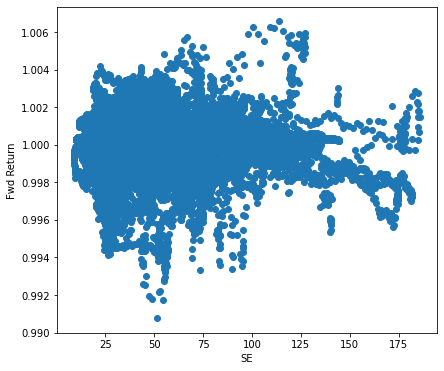

In [153]:
fig = plt.figure()
fig.set_size_inches(15,6)

#fig.subplots_adjust(hspace=1, wspace=1)

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('Fwd Return')
ax.set_xlabel('SE')
plt.scatter(seList, returnList, label = "")


In [154]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.array(seList)
X = X.reshape(-1, 1)
y = np.array(returnList)

reg = LinearRegression().fit(X, y )

In [155]:
reg.coef_

array([-2.14041191e-06])